<a href="https://colab.research.google.com/github/annine1/Deep-Learning-Project/blob/main/CNNProjectSpottheMaskChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Spot the Mask Challenge




This project sought to be able to predict the likelihood that an image contains a person wearing a face mask, or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary labraries

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.image as mpimg
import cv2,os

from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt


from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
%matplotlib inline

np.random.seed(0)

# The Dataset

The dataset consisted of 1308 images, 644 face images with masks and 664 without masks. The original dataset is available at https://zindi.africa/hackathons/spot-the-mask-challenge/data



# Data Loading


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/bloc5_review_phase/Convolutional NN/ProjectCNN/train_labels.csv')
df.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


## Show image

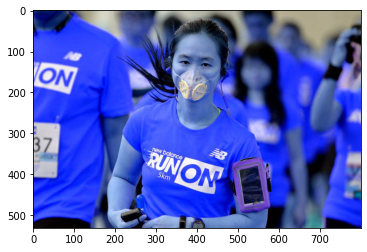

In [ ]:
for img_path in df.image.values[0:2]:
    full_img_path = os.path.join('/content/drive/MyDrive/bloc5_review_phase/Convolutional NN/ProjectCNN/images', img_path)
    img = cv2.imread(full_img_path)
    imgplot = plt.imshow(img)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c27480350>]],
      dtype=object)

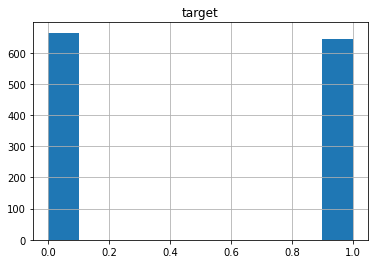

In [ ]:
df.hist()

## Dataset extraction
Here, we separate our images in two blocks: no mask and with Mask

In [ ]:

data_path='/content/drive/MyDrive/bloc5_review_phase/Convolutional NN/ProjectCNN/train images_noMask&withMask'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'no mask': 0, 'with Mask': 1}
['no mask', 'with Mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
data[0]

array([[ 51, 179, 160, ...,  59,  39,  24],
       [155, 181, 112, ...,  42,  33,  24],
       [155, 123,  69, ...,  46,  26, 101],
       ...,
       [ 40,  56,  55, ...,  53,  52,  53],
       [ 55,  45, 123, ...,  55,  57,  52],
       [ 56, 239, 252, ...,  52,  53,  52]], dtype=uint8)

In [ ]:
len(data)

1308

In [ ]:
# Scale data and convert into array

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

new_target=np_utils.to_categorical(target)

In [ ]:
#  just convert into list
array_target=target
list1 = array_target.tolist()
print(list1[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
new_target[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
  data[0]

array([[[0.2       ],
        [0.70196078],
        [0.62745098],
        ...,
        [0.23137255],
        [0.15294118],
        [0.09411765]],

       [[0.60784314],
        [0.70980392],
        [0.43921569],
        ...,
        [0.16470588],
        [0.12941176],
        [0.09411765]],

       [[0.60784314],
        [0.48235294],
        [0.27058824],
        ...,
        [0.18039216],
        [0.10196078],
        [0.39607843]],

       ...,

       [[0.15686275],
        [0.21960784],
        [0.21568627],
        ...,
        [0.20784314],
        [0.20392157],
        [0.20784314]],

       [[0.21568627],
        [0.17647059],
        [0.48235294],
        ...,
        [0.21568627],
        [0.22352941],
        [0.20392157]],

       [[0.21960784],
        [0.9372549 ],
        [0.98823529],
        ...,
        [0.20392157],
        [0.20784314],
        [0.20392157]]])

In [ ]:
data.shape

(1308, 100, 100, 1)

In [ ]:
data.shape[1:]

(100, 100, 1)

In [ ]:
new_target.shape

(1308, 2)

## Train and test  dataset 

In [ ]:
# split data into train_dat, train_target and  test_data, test_target

train_data,test_data,train_target,test_target=train_test_split(data,new_target,
                                                               test_size=0.3, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(915, 100, 100, 1)
(393, 100, 100, 1)
(915, 2)
(393, 2)


## Convolutional Neural Network (CNN) model

In [ ]:
# cnn model 1

model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_6 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 200)       360200    
_________________________________________________________________
activation_7 (Activation)    (None, 47, 47, 200)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 200)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 100)      

 ## Training and model compilation

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data, train_target, epochs=11, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/11
23/23 [==============================] - 96s 4s/step - loss: 0.7057 - accuracy: 0.5321 - val_loss: 0.6870 - val_accuracy: 0.5574
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/11
23/23 [==============================] - 94s 4s/step - loss: 0.6818 - accuracy: 0.5610 - val_loss: 0.6623 - val_accuracy: 0.5792
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/11
23/23 [==============================] - 93s 4s/step - loss: 0.6662 - accuracy: 0.6053 - val_loss: 0.6623 - val_accuracy: 0.6175
Epoch 4/11
23/23 [==============================] - 93s 4s/step - loss: 0.6442 - accuracy: 0.6360 - val_loss: 0.6939 - val_accuracy: 0.5683
Epoch 5/11
23/23 [==============================] - 93s 4s/step - loss: 0.6286 - accuracy: 0.6218 - val_loss: 0.6896 - val_accuracy: 0.6120
Epoch 6/11
23/23 [==============================] - 96s 4s/step - loss: 0.6203 - accuracy: 0.6567 - val_loss: 0.6859 - val_accuracy: 0.5792
Epoch 7/11
23/23 [==========================

In [ ]:
# evaluate the model

print(model.evaluate(test_data,test_target))

13/13 [==============================] - 13s 1s/step - loss: 0.7721 - accuracy: 0.6692
[0.7720804214477539, 0.669211208820343]


In [ ]:
# Making prediction

y_predict=model.predict(test_data)
y_predict[:5]

array([[0.02354407, 0.9764559 ],
       [0.9892322 , 0.01076779],
       [0.05656363, 0.9434364 ],
       [0.16884044, 0.83115953],
       [0.22549678, 0.77450323]], dtype=float32)

The predictions are prediction probabilities so we take the argmax of the predictions.

In [ ]:
y_classes=[np.argmax(element) for element in y_predict]
y_classes[:20]

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

In [ ]:
# test_target[:10]

In [ ]:
test_target_classes=[np.argmax(element) for element in test_target]
test_target_classes[:20]

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

## Model perfomance visualization

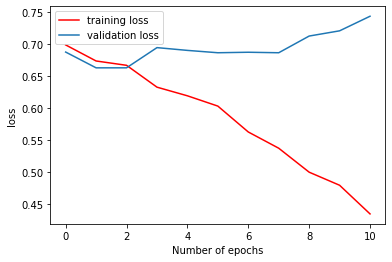

In [ ]:
# plotting loss and validation loss in the function of number of epoch

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

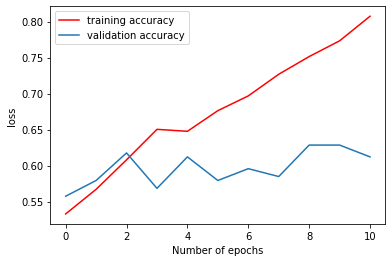

In [ ]:
# plotting accuracy and validation accuracy in function of number of epoch

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

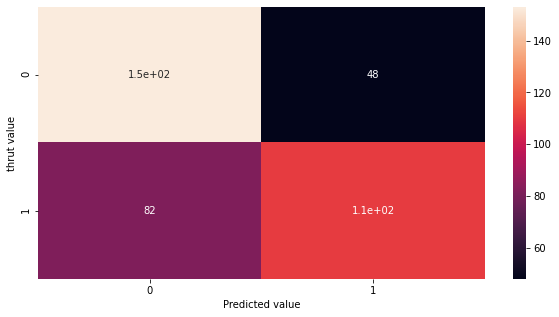

In [ ]:
# confusion matrix

cm=confusion_matrix(test_target_classes, y_classes)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

In [ ]:
# Classification report

print('Accuracy score:',accuracy_score(test_target_classes,y_classes))
print(classification_report(test_target_classes, y_classes))

Accuracy score: 0.6692111959287532
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       201
           1       0.70      0.57      0.63       192

    accuracy                           0.67       393
   macro avg       0.67      0.67      0.67       393
weighted avg       0.67      0.67      0.67       393



## Conclusion:
Our CNN model has achieved a test accuracy of over 67%. We obtained a prediction of class 0 (no Mask)with a precision of 65% and f1_score 70%, and of class 1 (with Mask) with a precision of 70% and a f1_score of 63%.